In [16]:
#Import the libraries
import pandas as pd
import numpy as np

In [17]:
#Load the dataset
df = pd.read_csv("/home/rajeev21august3261/Capstone Project/machinery_data.csv")

In [18]:
df.head()

,sensor_1,sensor_2,sensor_3,operational_hours,maintenance,RUL
0,0.496714,1.399355,-0.675178,831,0,4167.779109
1,-0.138264,0.924634,-0.144519,4061,0,937.137258
2,0.647689,0.059630,-0.792420,4801,0,197.222359
3,1.523030,-0.646937,-0.307962,2604,0,2393.654227
4,-0.234153,0.698223,-1.893615,714,0,4285.083772


In [17]:
df.info

<bound method DataFrame.info of      sensor_1  sensor_2  sensor_3  operational_hours  maintenance          RUL
0    0.496714  1.399355 -0.675178                831            0  4167.779109
1   -0.138264  0.924634 -0.144519               4061            0   937.137258
2    0.647689  0.059630 -0.792420               4801            0   197.222359
3    1.523030 -0.646937 -0.307962               2604            0  2393.654227
4   -0.234153  0.698223 -1.893615                714            0  4285.083772
..        ...       ...       ...                ...          ...          ...
995 -0.281100  1.070150  0.077481               1855            0  3048.815969
996  1.797687 -0.026521  0.257753               1677            0  3224.787052
997  0.640843 -0.881875 -1.241761               1396            0  3507.269844
998 -0.571179 -0.163067  0.334176               3874            0  1029.669913
999  0.572583 -0.744903 -0.155259               2320            0  2583.997492

[1000 rows x 6 colu

In [18]:
df.describe

<bound method NDFrame.describe of      sensor_1  sensor_2  sensor_3  operational_hours  maintenance          RUL
0    0.496714  1.399355 -0.675178                831            0  4167.779109
1   -0.138264  0.924634 -0.144519               4061            0   937.137258
2    0.647689  0.059630 -0.792420               4801            0   197.222359
3    1.523030 -0.646937 -0.307962               2604            0  2393.654227
4   -0.234153  0.698223 -1.893615                714            0  4285.083772
..        ...       ...       ...                ...          ...          ...
995 -0.281100  1.070150  0.077481               1855            0  3048.815969
996  1.797687 -0.026521  0.257753               1677            0  3224.787052
997  0.640843 -0.881875 -1.241761               1396            0  3507.269844
998 -0.571179 -0.163067  0.334176               3874            0  1029.669913
999  0.572583 -0.744903 -0.155259               2320            0  2583.997492

[1000 rows x 6 co

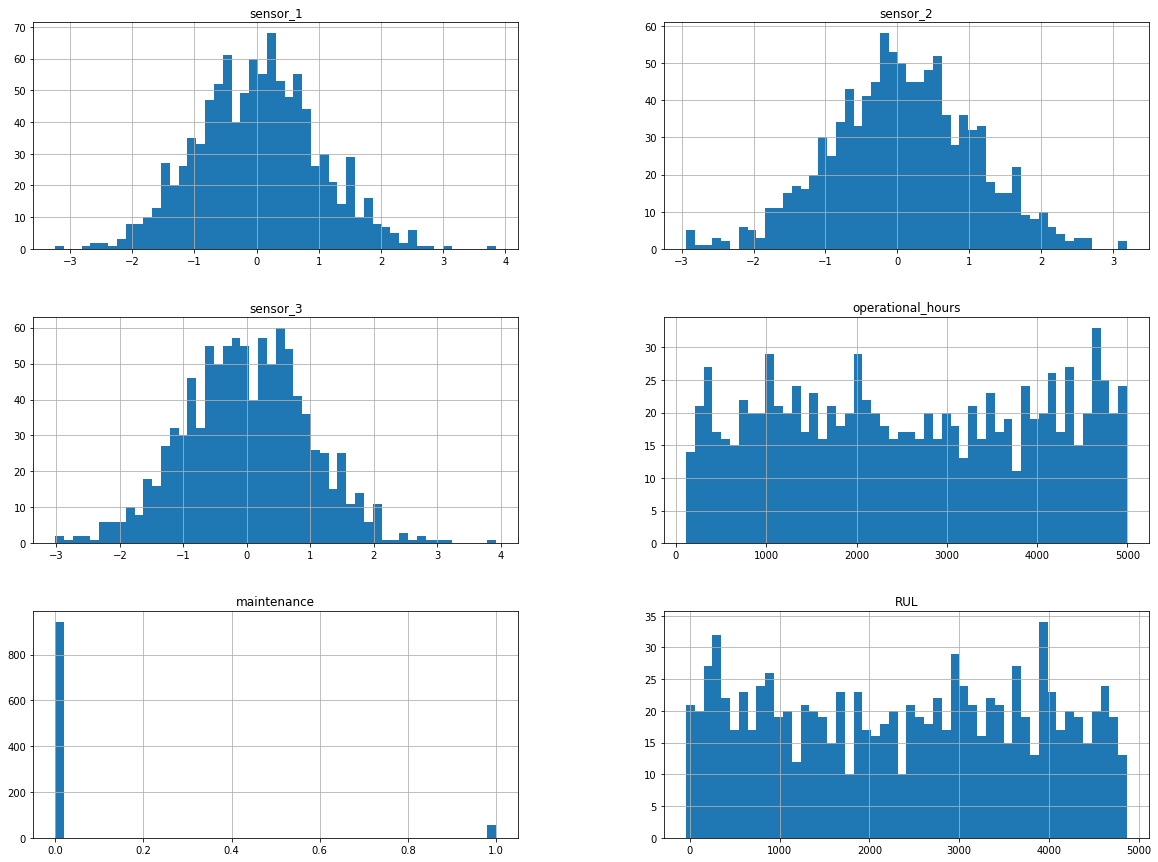

In [20]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='operational_hours', ylabel='RUL'>

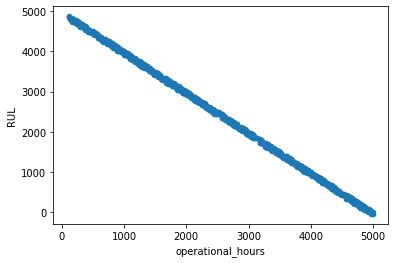

In [30]:
#Visualize the Data
df.plot(kind="scatter", x="operational_hours", y="RUL")


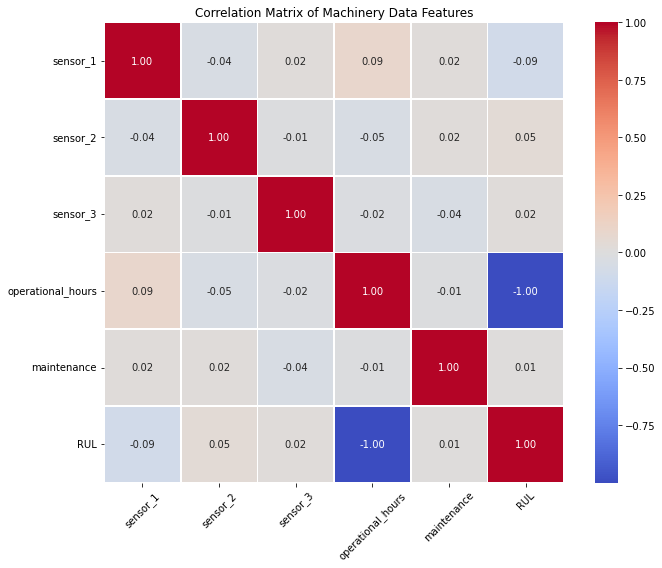

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix of Machinery Data Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
# Load data
data = pd.read_csv('machinery_data.csv')

In [37]:
# Handle missing values if any
print("Missing values per column:")
print(df.isnull().sum())

print("\nPercentage of missing values per column:")
print(df.isnull().mean() * 100)

Missing values per column:
sensor_1             0
sensor_2             0
sensor_3             0
operational_hours    0
maintenance          0
RUL                  0
dtype: int64

Percentage of missing values per column:
sensor_1             0.0
sensor_2             0.0
sensor_3             0.0
operational_hours    0.0
maintenance          0.0
RUL                  0.0
dtype: float64


In [43]:
data.fillna(method='ffill', inplace=True)

In [44]:
# Feature selection
features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours']
target_rul = 'RUL'
target_maintenance = 'maintenance'


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Normalize features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

In [12]:
import warnings 
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
data = pd.read_csv('machinery_data.csv')

# Handle missing values if any
data.fillna(method='ffill', inplace=True)

# Feature selection
features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours']
target_rul = 'RUL'
target_maintenance = 'maintenance'

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Normalize features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Split data for regression and classification
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(data[features], data[target_rul], test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(data[features], data[target_maintenance], test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train regression model
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = reg_model.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression Model MSE: {mse_reg}")


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train classification model
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Predict and evaluate
y_pred_clf = clf_model.predict(X_test_clf)
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
print(f"Classification Model Accuracy: {accuracy_clf}")
print(classification_report(y_test_clf, y_pred_clf))


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Train clustering model
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(data[features])

# Visualize clustering results
plt.scatter(data['sensor_1'], data['sensor_2'], c=data['cluster'])
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Clustering of Sensor Data')
plt.show()


def predict_maintenance(features):
    # Predict RUL
    rul_pred = reg_model.predict([features])
    
    # Predict maintenance status
    maint_pred = clf_model.predict([features])
    
    # Predict cluster (anomaly detection)
    cluster_pred = kmeans.predict([features])
    
    return {
        'RUL Prediction': rul_pred[0],
        'Maintenance Prediction': 'Needs Maintenance' if maint_pred[0] == 1 else 'Normal',
        'Anomaly Detection': 'Anomaly' if cluster_pred[0] == 1 else 'Normal'
    }

# Example prediction
sample_features = [0.1, 0.2, 0.3, 1000]
prediction = predict_maintenance(sample_features)
print(prediction)




Regression Model MSE: 1100.5050398049068
Classification Model Accuracy: 0.955
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       191
           1       0.00      0.00      0.00         9

    accuracy                           0.95       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.91      0.95      0.93       200



/usr/local/anaconda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 640x480 with 1 Axes>

{'RUL Prediction': -2.8158378688204437, 'Maintenance Prediction': 'Normal', 'Anomaly Detection': 'Normal'}


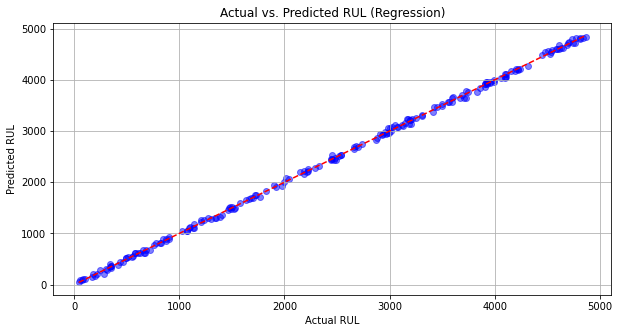

In [8]:
#1. Plot: Actual vs. Predicted RUL (Regression)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs. Predicted RUL (Regression)')
plt.grid(True)
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

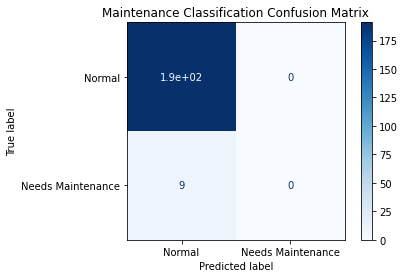

In [48]:
cm = confusion_matrix(y_test_clf, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Needs Maintenance'])

disp.plot(cmap='Blues')
plt.title("Maintenance Classification Confusion Matrix")
plt.show()

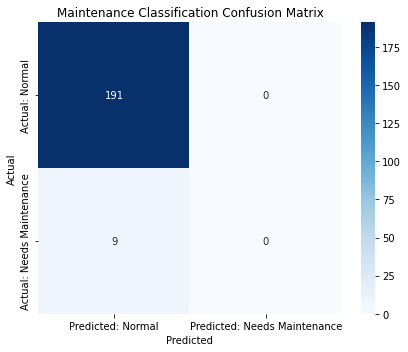

In [49]:
cm = confusion_matrix(y_test_clf, y_pred_clf)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Normal', 'Predicted: Needs Maintenance'],
            yticklabels=['Actual: Normal', 'Actual: Needs Maintenance'])
plt.title("Maintenance Classification Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

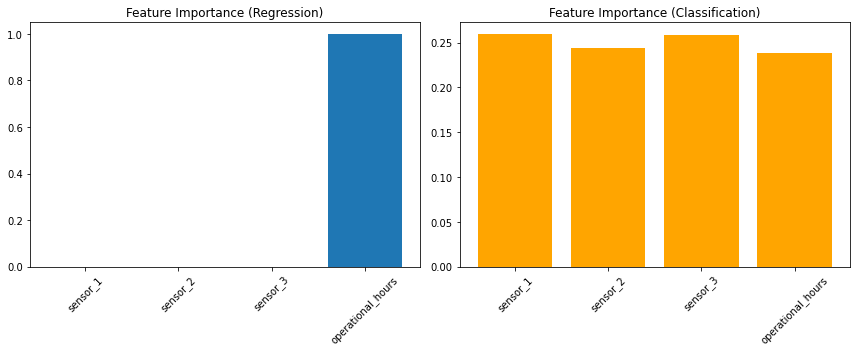

In [11]:
#3. Plot: Feature Importance (Regression + Classification)
#You can visualize which features are important for each model

importances_reg = reg_model.feature_importances_
importances_clf = clf_model.feature_importances_

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(features, importances_reg)
plt.title('Feature Importance (Regression)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(features, importances_clf, color='orange')
plt.title('Feature Importance (Classification)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

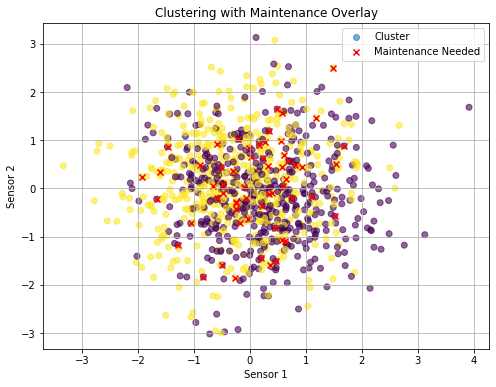

In [12]:
#Clustering Result With Maintenance Overlay
#Color code clusters and highlight points with maintenance == 1.

plt.figure(figsize=(8, 6))
plt.scatter(data['sensor_1'], data['sensor_2'], c=data['cluster'], cmap='viridis', alpha=0.6, label='Cluster')
plt.scatter(data[data['maintenance'] == 1]['sensor_1'],
            data[data['maintenance'] == 1]['sensor_2'],
            color='red', marker='x', label='Maintenance Needed')
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Clustering with Maintenance Overlay')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score
import numpy as np

In [14]:
#1. Regression Model with Cross-Validation (RUL prediction)
# Create K-Fold cross-validator
kfold_reg = KFold(n_splits=5, shuffle=True, random_state=42)

# Use neg_mean_squared_error because scikit-learn expects higher scores to be better
mse_scores = cross_val_score(
    reg_model, data[features], data[target_rul],
    scoring='neg_mean_squared_error',
    cv=kfold_reg
)

# Convert to positive MSE
mse_scores = -mse_scores
print("Cross-Validated MSE Scores (Regression):", mse_scores)
print("Average MSE:", mse_scores.mean())

Cross-Validated MSE Scores (Regression): [1150.88581026 1226.13738967 1192.96551277 1167.23518066 1025.0517449 ]
Average MSE: 1152.455127650299


In [15]:
#2. Classification Model with Cross-Validation (Maintenance prediction)
# StratifiedKFold ensures balanced classes in each fold
kfold_clf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(
    clf_model, data[features], data[target_maintenance],
    scoring='accuracy',
    cv=kfold_clf
)

print("Cross-Validated Accuracy Scores (Classification):", accuracy_scores)
print("Average Accuracy:", accuracy_scores.mean())

Cross-Validated Accuracy Scores (Classification): [0.94  0.945 0.94  0.94  0.935]
Average Accuracy: 0.9399999999999998


In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
# Define parameter grid for regression
param_grid_reg = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Grid Search with 5-fold CV
grid_search_reg = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_reg,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search on all data
grid_search_reg.fit(data[features], data[target_rul])

# Get best model and results
best_reg_model = grid_search_reg.best_estimator_
print("Best Regression Params:", grid_search_reg.best_params_)
print("Best CV MSE (neg):", grid_search_reg.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   34.4s finished


Best Regression Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Best CV MSE (neg): -1634.3272910956543


In [18]:
#2. Grid Search: Random Forest Classifier
# Define parameter grid for classification
param_grid_clf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Grid Search with 5-fold Stratified CV
grid_search_clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_clf,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search on all data
grid_search_clf.fit(data[features], data[target_maintenance])

# Get best model and results
best_clf_model = grid_search_clf.best_estimator_
print("Best Classification Params:", grid_search_clf.best_params_)
print("Best CV F1 Score:", grid_search_clf.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.2s


Best Classification Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best CV F1 Score: 0.0


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   20.1s finished


In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

class SensorAnomalyFlagger(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=2.0):
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Assume sensor_1 is at column index 0
        X = X.copy()
        flag = (X[:, 0] > self.threshold).astype(int)
        return np.hstack([X, flag.reshape(-1, 1)])

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Feature groups
numeric_features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours']
categorical_features = ['machine_type', 'operator_shift']

# ColumnTransformer to preprocess data
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

<AxesSubplot:>

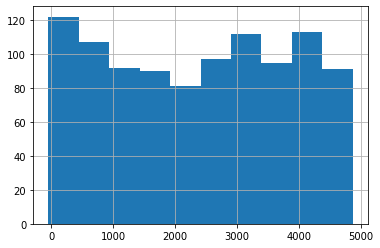

In [11]:
df["RUL"].hist()

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [26]:
param_grid_reg = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [27]:
param_grid_clf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
grid_search_reg = GridSearchCV(reg_pipeline, param_grid_reg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_clf = GridSearchCV(clf_pipeline, param_grid_clf, cv=5, scoring='accuracy', n_jobs=-1)

In [32]:
grid_search_reg.fit(X_train_reg, y_train_reg)
grid_search_clf.fit(X_train_clf, y_train_clf)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=True,
                                        

In [38]:
print("Best parameters for regression:", grid_search_reg.best_params_)
print("Best CV MSE (negative):", grid_search_reg.best_score_)

print("Best parameters for classification:", grid_search_clf.best_params_)
print("Best CV accuracy:", grid_search_clf.best_score_)

Best parameters for regression: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best CV MSE (negative): -1148.7638316041155
Best parameters for classification: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best CV accuracy: 0.93875


In [41]:
best_reg_model = grid_search_reg.best_estimator_
y_pred_reg = best_reg_model.predict(X_test_reg)

best_clf_model = grid_search_clf.best_estimator_
y_pred_clf = best_clf_model.predict(X_test_clf)

In [20]:
print(data.dtypes)

sensor_1             float64
sensor_2             float64
sensor_3             float64
operational_hours      int64
maintenance            int64
RUL                  float64
dtype: object


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [22]:
numeric_features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours']

In [23]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        # Uncomment below if you have categorical features
        # ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Pipeline for regression (RUL prediction)
reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Pipeline for classification (maintenance prediction)
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Assuming your data is loaded as `data`

# Features and target
features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours']
X = data[features]
y = data['RUL']

# Create a pipeline with scaling + model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Perform 5-fold cross-validation, scoring with neg_mean_squared_error (lower MSE is better)
neg_mse_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Convert negative MSE scores to positive MSE
mse_scores = -neg_mse_scores

print(f"Cross-validated MSE scores: {mse_scores}")
print(f"Mean MSE: {mse_scores.mean()}")
print(f"Standard Deviation of MSE: {mse_scores.std()}")

Cross-validated MSE scores: [2860.69377743 1188.45255876  392.37803958 1282.62159475 2597.97301178]
Mean MSE: 1664.4237964608237
Standard Deviation of MSE: 926.6064917463214


In [44]:
corr_matrix = df.corr(numeric_only=True)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np

#Load the dataset
df = pd.read_csv("/home/rajeev21august3261/Capstone Project/machinery_data.csv")
df.head()
df.info
df.describe

#Point 2

#Explore the dataset
%matplotlib inline
import matplotlib.pyplot as plt


df.hist(bins=50, figsize=(20,15))
plt.show()


# Handle missing values if any

print("Missing values per column:")
print(df.isnull().sum())

print("\nPercentage of missing values per column:")
print(df.isnull().mean() * 100)


df.fillna(method='ffill', inplace=True)

# Feature selection
features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours']
target_rul = 'RUL'
target_maintenance = 'maintenance'

#features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours']
#These are all numerical (float64 or int64).

#The maintenance column is your target (0 or 1), which is numeric but can be treated as categorical for classification.
#So, no categorical features currently in your features list.

# Normalize features

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])



# Split data for regression and classification
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(df[features], df[target_rul], test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(df[features], df[target_maintenance], test_size=0.2, random_state=42)

#Point 3


#Visualize the Data
df.plot(kind="scatter", x="operational_hours", y="RUL")


import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix of Machinery Data Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



# Train regression model


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = reg_model.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression Model MSE: {mse_reg}")


# Train classification model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Predict and evaluate
y_pred_clf = clf_model.predict(X_test_clf)
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
print(f"Classification Model Accuracy: {accuracy_clf}")
print(classification_report(y_test_clf, y_pred_clf))

# Train clustering model

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features])

# Visualize clustering results
plt.scatter(df['sensor_1'], df['sensor_2'], c=df['cluster'])
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Clustering of Sensor Data')
plt.show()

#scale the input before calling to manage the raw data in Example prediction

scaled_sample = scaler.transform([sample_features])
prediction = predict_maintenance(scaled_sample[0])

def predict_maintenance(features):
    # Predict RUL
    rul_pred = reg_model.predict([features])
    
    # Predict maintenance status
    maint_pred = clf_model.predict([features])
    
    # Predict cluster (anomaly detection)
    cluster_pred = kmeans.predict([features])
    
    return {
        'RUL Prediction': rul_pred[0],
        'Maintenance Prediction': 'Needs Maintenance' if maint_pred[0] == 1 else 'Normal',
        'Anomaly Detection': 'Anomaly' if cluster_pred[0] == 1 else 'Normal'
    }

# Example prediction
sample_features = [0.1, 0.2, 0.3, 1000]
prediction = predict_maintenance(sample_features)
print(prediction)

#1. Regression Model with Cross-Validation (RUL prediction)
# Create K-Fold cross-validator
kfold_reg = KFold(n_splits=5, shuffle=True, random_state=42)

# Use neg_mean_squared_error because scikit-learn expects higher scores to be better
mse_scores = cross_val_score(
    reg_model, df[features], df[target_rul],
    scoring='neg_mean_squared_error',
    cv=kfold_reg
)

# Convert to positive MSE
mse_scores = -mse_scores
print("Cross-Validated MSE Scores (Regression):", mse_scores)
print("Average MSE:", mse_scores.mean())

#2. Classification Model with Cross-Validation (Maintenance prediction)
# StratifiedKFold ensures balanced classes in each fold
kfold_clf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(
    clf_model, df[features], df[target_maintenance],
    scoring='accuracy',
    cv=kfold_clf
)

print("Cross-Validated Accuracy Scores (Classification):", accuracy_scores)
print("Average Accuracy:", accuracy_scores.mean())

#Create pipeline

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Pipeline for regression
reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Pipeline for classification
clf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])


#fine-tune your Random Forest using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


param_grid_reg = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

param_grid_clf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

#Step 3: Set up GridSearchCV with your pipeline

from sklearn.pipeline import Pipeline

# Assuming reg_pipeline and clf_pipeline are your pipelines

grid_search_reg = GridSearchCV(reg_pipeline, param_grid_reg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_clf = GridSearchCV(clf_pipeline, param_grid_clf, cv=5, scoring='accuracy', n_jobs=-1)

#Step 4: Fit GridSearch to your training data

grid_search_reg.fit(X_train_reg, y_train_reg)
grid_search_clf.fit(X_train_clf, y_train_clf)

#Step 5: Check best parameters and best scores

print("Best parameters for regression:", grid_search_reg.best_params_)
print("Best CV MSE (negative):", grid_search_reg.best_score_)

print("Best parameters for classification:", grid_search_clf.best_params_)
print("Best CV accuracy:", grid_search_clf.best_score_)

#Step 6: Use the best estimator to predict

    
best_reg_model = grid_search_reg.best_estimator_
y_pred_reg = best_reg_model.predict(X_test_reg)

best_clf_model = grid_search_clf.best_estimator_
y_pred_clf = best_clf_model.predict(X_test_clf)






#1. Plot: Actual vs. Predicted RUL (Regression)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs. Predicted RUL (Regression)')
plt.grid(True)
plt.show()



#3. Plot: Feature Importance (Regression + Classification)
#You can visualize which features are important for each model

importances_reg = reg_model.feature_importances_
importances_clf = clf_model.feature_importances_

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(features, importances_reg)
plt.title('Feature Importance (Regression)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(features, importances_clf, color='orange')
plt.title('Feature Importance (Classification)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#Clustering Result With Maintenance Overlay
#Color code clusters and highlight points with maintenance == 1.

plt.figure(figsize=(8, 6))
plt.scatter(df['sensor_1'], df['sensor_2'], c=df['cluster'], cmap='viridis', alpha=0.6, label='Cluster')
plt.scatter(df[df['maintenance'] == 1]['sensor_1'],
            df[df['maintenance'] == 1]['sensor_2'],
            color='red', marker='x', label='Maintenance Needed')
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Clustering with Maintenance Overlay')
plt.legend()
plt.grid(True)
plt.show()



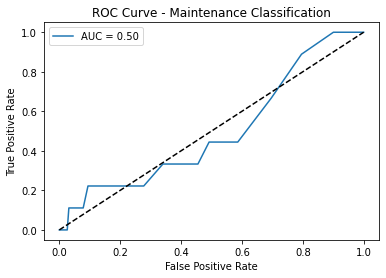

In [50]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test_clf, clf_model.predict_proba(X_test_clf)[:,1])
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Maintenance Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

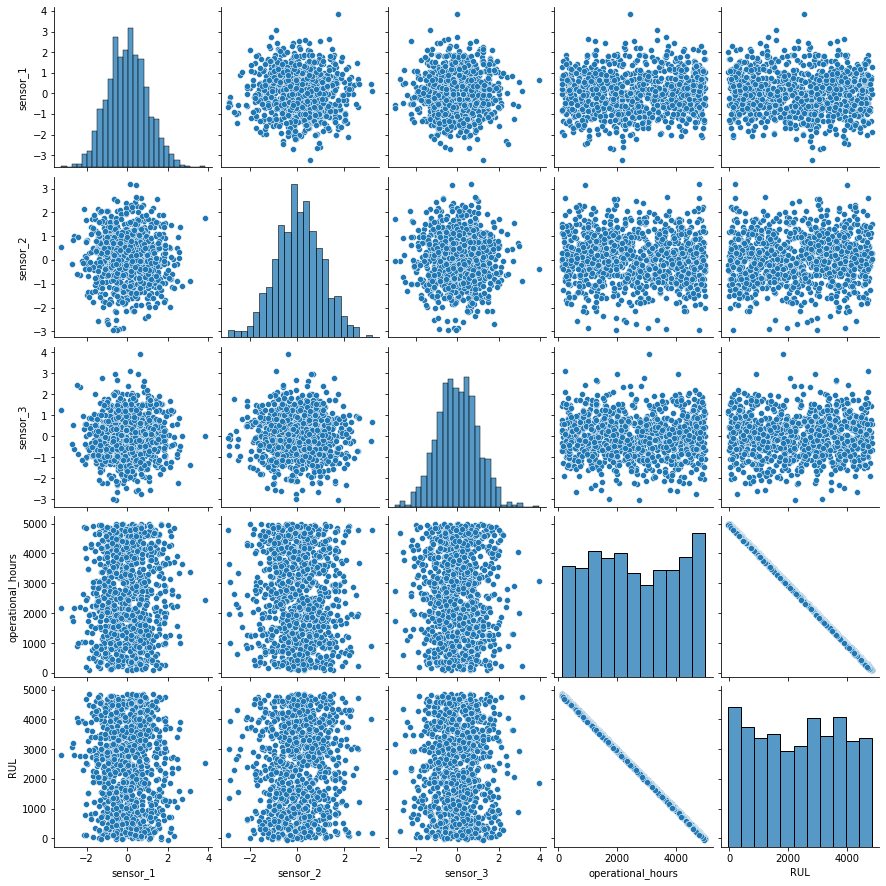

In [51]:
sns.pairplot(df[features + [target_rul]])
plt.show()

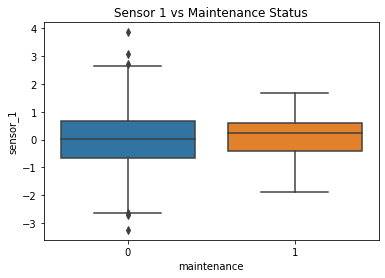

In [52]:
sns.boxplot(x='maintenance', y='sensor_1', data=df)
plt.title('Sensor 1 vs Maintenance Status')
plt.show()

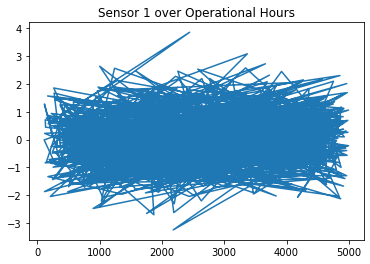

In [53]:
plt.plot(df['operational_hours'], df['sensor_1'])
plt.title('Sensor 1 over Operational Hours')
plt.show()

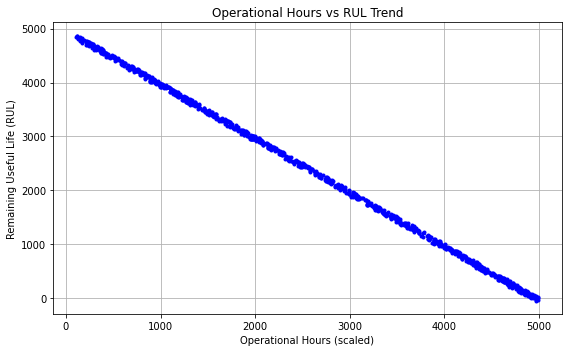

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your preprocessed dataframe
# and contains columns: 'operational_hours' and 'RUL'

# Sort by operational hours for better visualization
sorted_df = df.sort_values('operational_hours')

# Plot the trend
plt.figure(figsize=(8, 5))
plt.plot(sorted_df['operational_hours'], sorted_df['RUL'],
         marker='o', linewidth=0.8, markersize=3, color='blue')

plt.xlabel('Operational Hours (scaled)')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('Operational Hours vs RUL Trend')
plt.grid(True)
plt.tight_layout()
plt.show()